Locally Linear Embedding
===

* *0:00 min* | Última modificación: Septiembre 21, 2021 | YouTube

## Algoritmo

Este algoritmo preserva los embeddings de datos altamente dimensionales.

La metodología opera de la siguiente manera:


* Los patrones están organizados en una tabla donde las filas representan los puntos y las columnas las dimensiones.


* Se realiza la búsqueda de los $k$ vecinos más cercanos.


* Se construye un modelo donde cada patrón $X_i$ es reconstruido a través de sus vecinos $X_j$.

$$
\sum_i \left|
X_i - \sum_j W_{ij}X_j
\right|^2
$$

* La matriz $W_{ij}$ representa la contribución del patrón $j$ a la reconstrucción del patrón $i$. $W_{ij} = 0$ cuando $X_j$ no está en la vencidad del patrón $X_i$. Adicionalmente, se impone la restricción

$$
\sum_j W_{ij} = 1
$$

* El embedding se obtiene al obtener los vectores $Y_i$ de baja dimensionalidad que minimizan:

$$
\sum_i \left|
Y_i - \sum_j W_{ij}Y_j
\right|^2
$$

![Locally_Linear_Embedding.png](assets/Locally_Linear_Embedding.png)

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [1]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6, return_X_y=False)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

display(
    n_samples,
    n_features,
)

1083

64

Cada dígito está representado por una matriz de 8 x 8 pixels.

![digits_dataset.png](assets/digits_dataset.png)

In [2]:
from sklearn.manifold import LocallyLinearEmbedding
import numpy as np

n_neighbors = 30

locallyLinearEmbedding = LocallyLinearEmbedding(
    # -----------------------------------------------------
    # number of neighbors to consider for each point.
    n_neighbors=30,
    # -----------------------------------------------------
    # number of coordinates for the manifold
    n_components=2,
    # -----------------------------------------------------
    # algorithm
    #   'standard': use the standard locally linear embedding algorithm
    #   'hessian': use the Hessian eigenmap method.
    #   'modified': use the modified locally linear embedding algorithm
    #   'ltsa': use local tangent space alignment algorithm.
    method="standard",
    # -----------------------------------------------------
    # algorithm to use for nearest neighbors search
    #   'auto'
    #   'brute'
    #   'kd_tree'
    #   'ball_tree'
    neighbors_algorithm="auto",
)

#
# El objeto retornado contiene
#   embedding_
#   reconstruction_error_
#   nbrs_
#
X_projected = locallyLinearEmbedding.fit_transform(X)

x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_scaled = (X_projected - x_min) / (x_max - x_min)

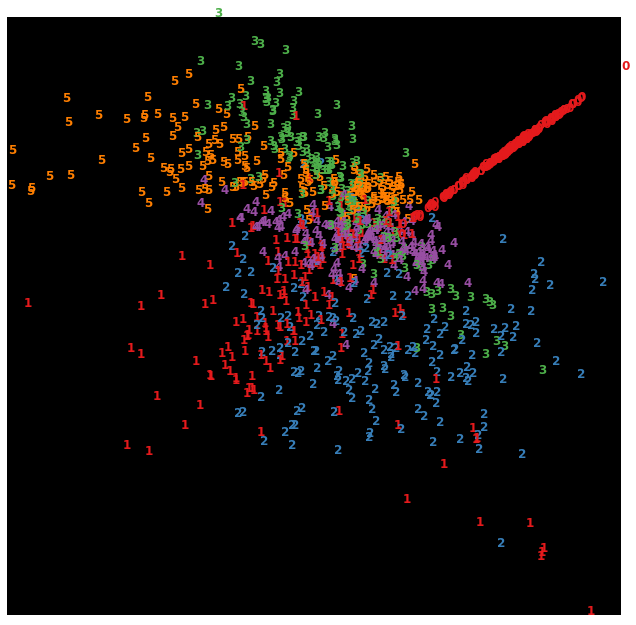

In [3]:
from matplotlib import offsetbox
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 11))
plt.style.use("dark_background")

for i in range(X_scaled.shape[0]):

    plt.text(
        X_scaled[i, 0],
        X_scaled[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 12},
    )

plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()